In [7]:
import numpy as np 
import sys
import os
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '../src'))
if src_path not in sys.path:
    sys.path.append(src_path)
from data_prep import get_laplacian_US_ROADS
from plotting import animate_heat,plot_three_time_steps
from heatflow import compute_heat_evolution

In [12]:
graph_path = '../data/usroads.mtx'
coord_path = '../data/usroads_coord.mtx'
# Load Laplacian
laplacian_matrix, filtered_x, filtered_y, mapped_ind_i, mapped_ind_j = get_laplacian_US_ROADS(
    graph_file_path=graph_path,
    coord_file_path=coord_path
)
n_filtered_nodes = len(filtered_x)
print("Loaded Graph contains", n_filtered_nodes, "vertices")

Laplacian is a sparse matrix with format: coo
Loaded Graph contains 125618 vertices


In [3]:
# Compute heat evolution
heat_distributions, delta_heats, time_steps = compute_heat_evolution(
    laplacian_matrix=laplacian_matrix,
    filtered_x=filtered_x,
    filtered_y=filtered_y,
    n_filtered_nodes=n_filtered_nodes,
    diffusion_rate=0.5,
    center_point=(-118, 34), #Caltech
    radius=0.5,
    initial_heat=1.0,
    time_end=140,
    num_steps=25
)

# Plot heat evolution and create GIF
animate_heat(
    filtered_x=filtered_x,
    filtered_y=filtered_y,
    mapped_ind_i=mapped_ind_i,
    mapped_ind_j=mapped_ind_j,
    delta_heats=delta_heats,
    time_steps=time_steps,
    output_dir='delta_heat_frames',
    gif_name='incremental_heat_diffusionCT.gif',
    cmap='coolwarm',
    dpi=500,
    frame_duration=0.5
)

Laplacian is a sparse matrix with format: coo
Time using expm_multiply: 22.9513 seconds


/Users/pren/miniconda3/envs/tensor/lib/python3.12/site-packages/matplotlib/cbook.py:1762: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


GIF saved as 'incremental_heat_diffusionCT.gif'


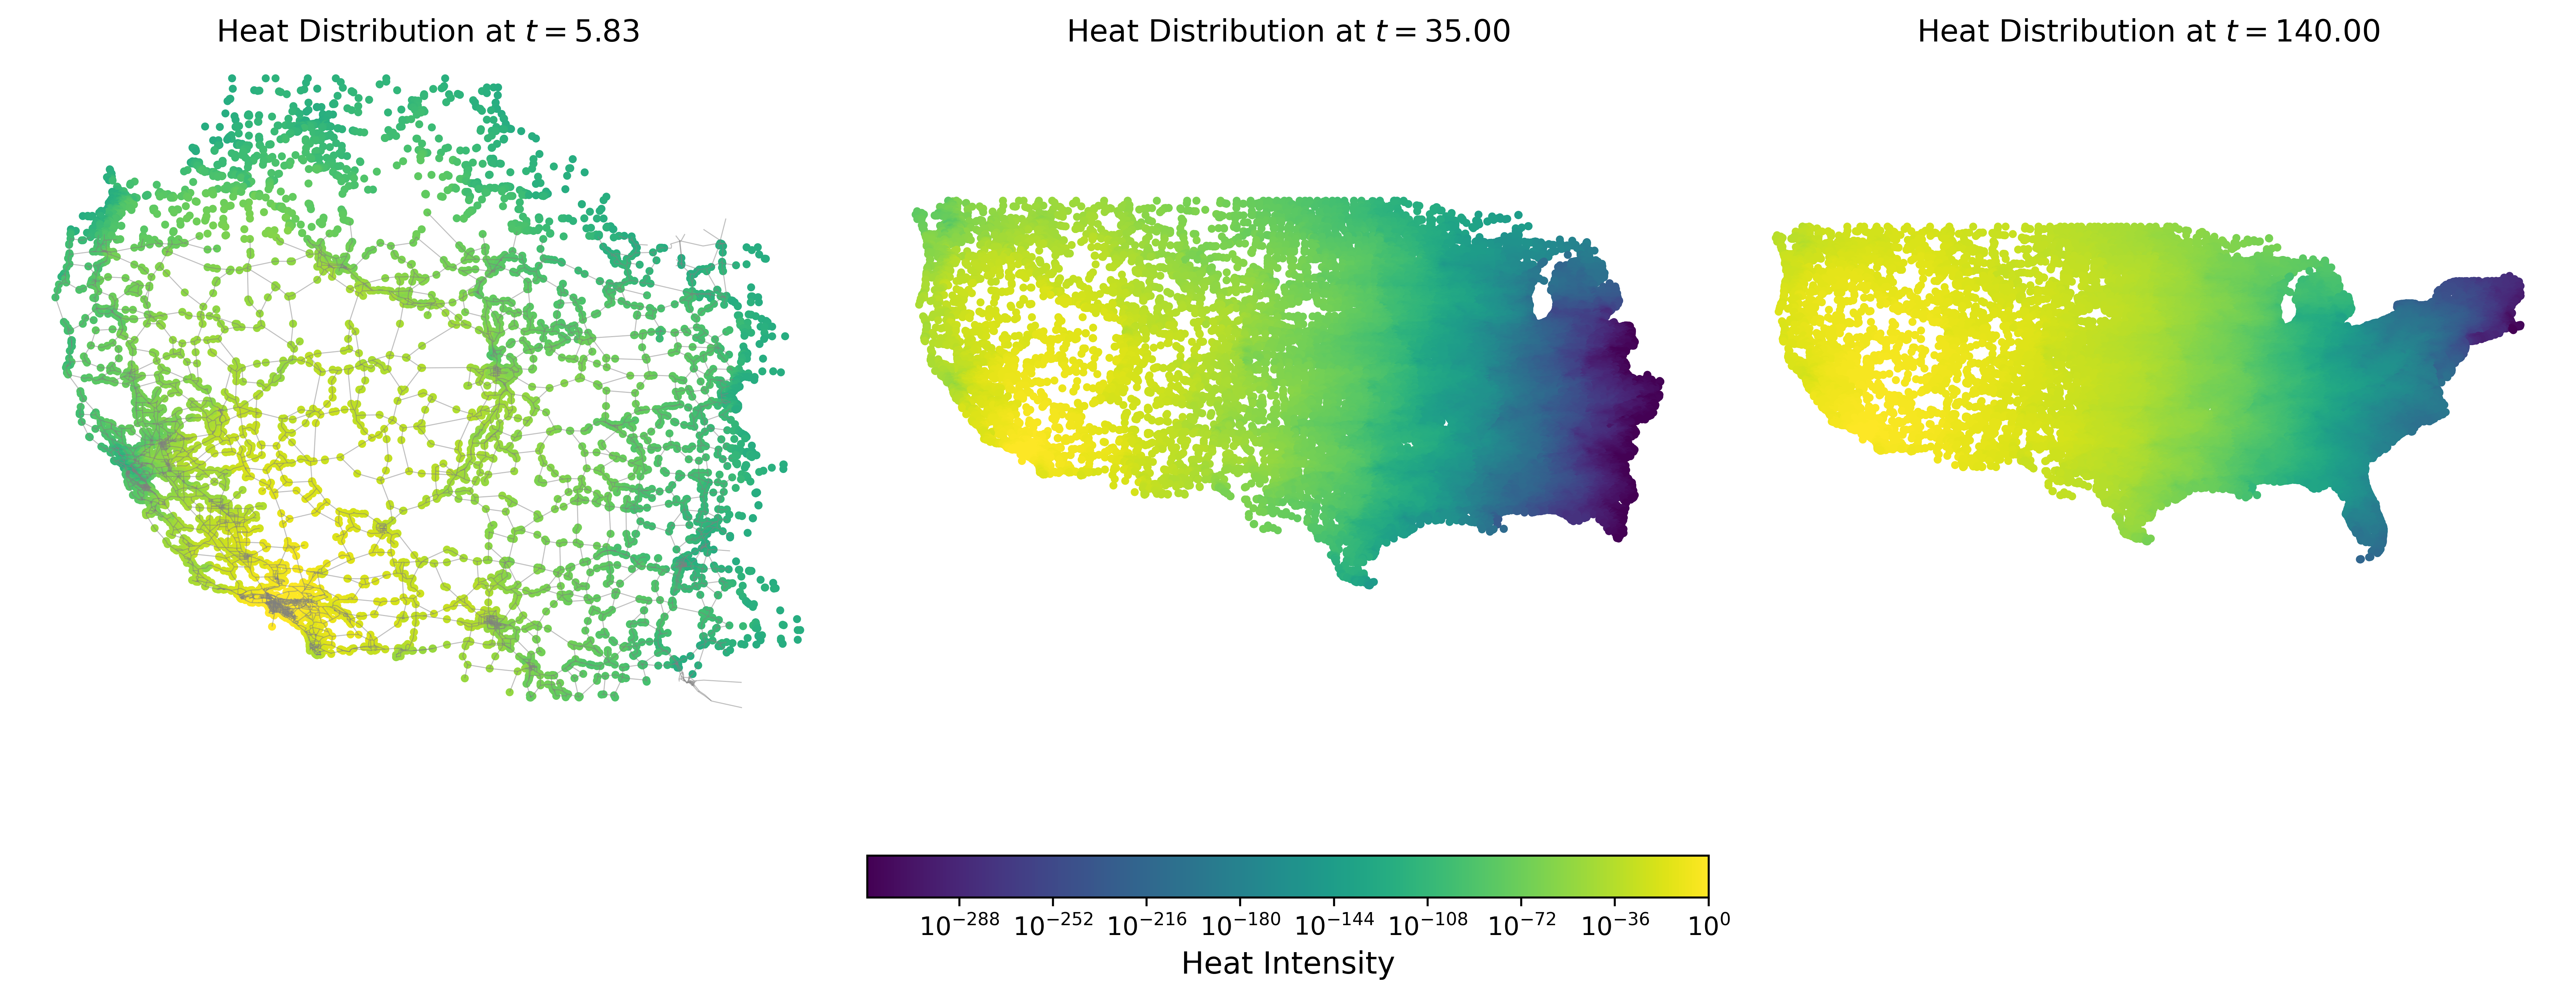

In [9]:
target_indices = [1, 6, 24]

segments = np.array([
    [
        [filtered_x[mapped_ind_i[j]], filtered_y[mapped_ind_i[j]]],
        [filtered_x[mapped_ind_j[j]], filtered_y[mapped_ind_j[j]]]
    ]
    for j in range(len(mapped_ind_i))
])

plot_three_time_steps(
    time_steps,
    heat_distributions,
    target_indices,
    filtered_x,
    filtered_y,
    mapped_ind_i,
    mapped_ind_j,
    cmap='coolwarm'
)